<a href="https://colab.research.google.com/github/Andre01Junior/Python-Atividades-I.a/blob/main/chute_um_numero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digite um número: 80
O número é menor. Tente novamente.
Digite um número: 65
O número é menor. Tente novamente.
Digite um número: 45
O número é maior. Tente novamente.
Digite um número: 50
O número é maior. Tente novamente.
Digite um número: 58
Game Over! O número era 62. Sua pontuação: 37.62

Histórico de Tentativas:
Tentativa 1: Palpite = 80, Estado = Esperando tentativa, Pontuação = 0.00
Tentativa 2: Palpite = 65, Estado = Tentativa errada (muito alto), Pontuação = 67.42
Tentativa 3: Palpite = 45, Estado = Tentativa errada (muito alto), Pontuação = 57.03
Tentativa 4: Palpite = 50, Estado = Tentativa errada (muito baixo), Pontuação = 46.77
Tentativa 5: Palpite = 58, Estado = Tentativa errada (muito baixo), Pontuação = 37.62


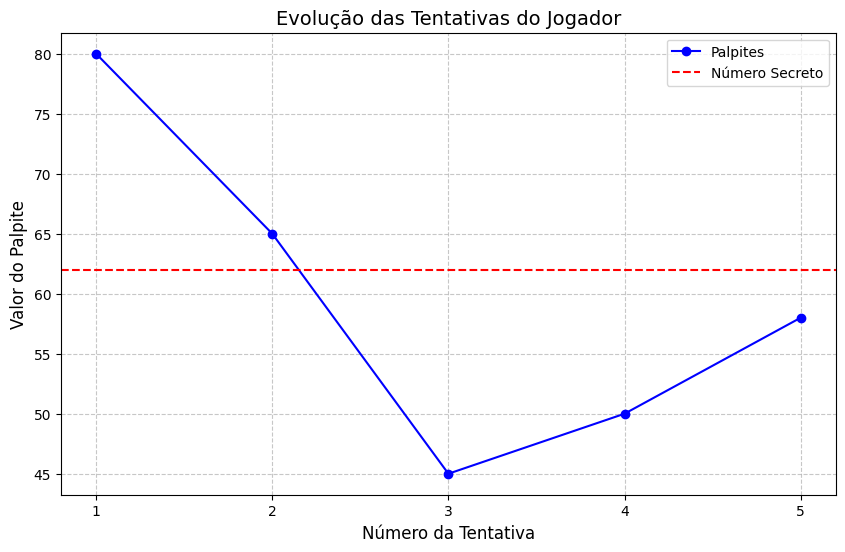

In [22]:
import time
import random
import matplotlib.pyplot as plt

class GameAgent:
    def __init__(self, secret_number, max_attempts=5):
        self.secret_number = secret_number
        self.max_attempts = max_attempts
        self.attempts = 0
        self.state = "Esperando tentativa"
        self.history = []  # Histórico de tentativas
        self.start_time = time.time()  # Tempo inicial do jogo
        self.score = 0  # Pontuação inicial

    def make_guess(self, guess):
        self.attempts += 1
        self.history.append({
            'attempt': self.attempts,
            'guess': guess,
            'state': self.state,
            'score': self.score
        })

        if guess == self.secret_number:
            self.state = "Acertou!"
            self.calculate_score()  # Calcula a pontuação ao acertar
            return f"Parabéns! Você acertou o número. Sua pontuação: {self.score:.2f}"
        elif self.attempts >= self.max_attempts:
            self.state = "Fim do jogo"
            return f"Game Over! O número era {self.secret_number}. Sua pontuação: {self.score:.2f}"
        elif guess < self.secret_number:
            self.state = "Tentativa errada (muito baixo)"
            self.calculate_score()  # Atualiza a pontuação após a tentativa errada
            return "O número é maior. Tente novamente."
        else:
            self.state = "Tentativa errada (muito alto)"
            self.calculate_score()  # Atualiza a pontuação após a tentativa errada
            return "O número é menor. Tente novamente."

    def calculate_score(self):
        elapsed_time = time.time() - self.start_time
        # Fórmula de pontuação: 100 pontos - (número de tentativas * 5) - (tempo decorrido * 2)
        self.score = 100 - (self.attempts * 5) - (elapsed_time * 2)
        # Garante que a pontuação não seja negativa
        self.score = max(0, self.score)

    def show_history(self):
        print("\nHistórico de Tentativas:")
        for entry in self.history:
            print(f"Tentativa {entry['attempt']}: Palpite = {entry['guess']}, Estado = {entry['state']}, Pontuação = {entry['score']:.2f}")

    def plot_attempts(self):
        if not self.history:
            print("Nenhum dado disponível para plotagem.")
            return

        plt.figure(figsize=(10, 6))
        attempts = [entry['attempt'] for entry in self.history]
        guesses = [entry['guess'] for entry in self.history]

        plt.plot(attempts, guesses, marker='o', linestyle='-', color='b', label='Palpites')
        plt.axhline(y=self.secret_number, color='r', linestyle='--', label='Número Secreto')
        plt.xlabel("Número da Tentativa", fontsize=12)
        plt.ylabel("Valor do Palpite", fontsize=12)
        plt.title("Evolução das Tentativas do Jogador", fontsize=14)
        plt.xticks(attempts)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.show()

# Criando um agente com um número secreto entre 1 e 100
agent = GameAgent(secret_number=random.randint(1, 100))

while agent.state not in ["Acertou!", "Fim do jogo"]:
    guess = int(input("Digite um número: "))
    print(agent.make_guess(guess))

# Mostrar histórico de tentativas ao final do jogo
agent.show_history()

# Gerar gráfico das tentativas
agent.plot_attempts()
